<a href="https://colab.research.google.com/github/joyceee916/ATMS-597-SP-2020-Project-4/blob/master/Project4_Joyce_v2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
cd /content/drive/My Drive/ATMS 597/Project4

/content/drive/My Drive/ATMS 597/Project4


Importing KCMI Observational Data (Daily) (Target)

In [22]:
KCMI_daily = pd.read_csv("KCMI_daily_format.csv", parse_dates=True, index_col='Date')
KCMI_daily.rename(columns={'TMAX(C)': 'TMAX_Obs', 'TMIN(C)': 'TMIN_Obs', 'WMAX(M/s)': 'WMAX_Obs', 'PREC(mm}': 'RTOT_Obs'}, inplace = True)
KCMI_daily.dropna(inplace=True)
KCMI_daily.index = KCMI_daily.index + pd.DateOffset(hours=12)  
KCMI_daily = KCMI_daily.rename_axis('Time')
KCMI_daily.head()

,TMAX_Obs,TMIN_Obs,WMAX_Obs,RTOT_Obs
Time,,,,
2010-01-01 12:00:00,-11.111111,-16.666667,6.70560,0.0
2010-01-02 12:00:00,-14.444444,-20.555556,6.70560,0.0
2010-01-03 12:00:00,-12.222222,-21.111111,4.91744,0.0
2010-01-04 12:00:00,-11.666667,-18.888889,8.94080,0.0
2010-01-05 12:00:00,-12.222222,-18.333333,7.15264,0.0


Importing KCMI Observational Data (Hourly) (Features)

In [23]:
KCMI_hourly = pd.read_csv("Obs_hourly_predictor_2010_2019.csv", parse_dates=True, index_col='Timestamp')
KCMI_hourly.rename(columns={'Tmax': 'TMAX_Hourly_Obs', 'Tmin': 'TMIN_Hourly_Obs', 'Wmax': 'WMAX_Hourly_Obs', 'precip': 'RTOT_Hourly_Obs'}, inplace = True)
KCMI_hourly.dropna(inplace=True)
# pull it back by one day since for a real forecast you wouldn't have observational data for that day
KCMI_hourly.index = KCMI_hourly.index + pd.DateOffset(hours=12)  
KCMI_hourly = KCMI_hourly.rename_axis('Time')
KCMI_hourly.head()

,TMAX_Hourly_Obs,TMIN_Hourly_Obs,WMAX_Hourly_Obs,RTOT_Hourly_Obs
Time,,,,
2010-01-01 12:00:00,0.6,-0.6,8.8,0.6
2010-01-02 12:00:00,-10.0,-16.1,6.2,0.0
2010-01-03 12:00:00,-12.8,-19.4,6.7,0.0
2010-01-04 12:00:00,-12.8,-21.1,4.6,0.0
2010-01-05 12:00:00,-12.2,-18.9,6.7,0.0


GFS Daily Model 

In [24]:
GFS_daily = pd.read_csv("GFS_daily_2010_2019_test.csv", parse_dates=True, index_col='Time')
GFS_daily.drop(columns="Unnamed: 0", inplace=True)
GFS_daily.rename(columns={'TMAX': 'TMAX_GFS', 'TMIN': 'TMIN_GFS', 'WMAX': 'WMAX_GFS', 'RTOT': 'RTOT_GFS'}, inplace = True)
GFS_daily.dropna(inplace=True)
GFS_daily.head()

,TMAX_GFS,TMIN_GFS,WMAX_GFS,RTOT_GFS
Time,,,,
2010-01-01 12:00:00,-11.26,-16.46,7.323933,0.05
2010-01-02 12:00:00,-10.16,-15.96,4.687217,0.00
2010-01-03 12:00:00,-9.96,-14.36,5.941380,0.06
2010-01-04 12:00:00,-8.46,-12.86,5.685068,0.17
2010-01-05 12:00:00,-7.16,-11.06,3.794733,0.77


GFS Surface Data

In [25]:
GFS_surface = pd.read_csv("GFS_Sfc_new.csv", parse_dates=True, index_col='Time')
GFS_surface.rename(columns={'DWPC': 'DWPC_Surf', 'HCLD': 'HCLD_Surf', 'LCLD': 'LCLD_Surf', 'MCLD': 'MCLD_Surf',
                            'PRCP': 'PRCP_Surf', 'PRES': 'PRES_Surf', 'TMPC': 'TMPC_Surf', 'UWND': 'UWND_Surf',
                            'VWND': 'VWND_Surf', 'WSPD': 'WSPD_Surf'}, inplace = True)
GFS_surface.dropna(inplace=True)
GFS_surface.head(10)
GFS_surface.replace({9999.0: np.nan}, inplace=True)
GFS_surface.replace({-9999.0: np.nan}, inplace=True)
GFS_surface

,DWPC_Surf,HCLD_Surf,LCLD_Surf,MCLD_Surf,PRCP_Surf,PRES_Surf,TMPC_Surf,UWND_Surf,VWND_Surf,WSPD_Surf
Time,,,,,,,,,,
2010-01-02 06:00:00,-13.74,0.0,100.0,1.0,0.00,1000.0,-11.26,4.3,-5.4,6.902898
2010-01-02 09:00:00,-15.19,0.0,100.0,0.0,0.04,1000.4,-12.66,4.9,-5.3,7.218033
2010-01-02 12:00:00,-17.91,0.0,100.0,0.0,0.01,1000.7,-14.76,4.2,-6.0,7.323933
2010-01-02 15:00:00,-20.07,0.0,8.0,0.0,0.00,1002.0,-15.76,4.3,-4.5,6.224147
2010-01-02 18:00:00,-18.81,0.0,2.0,0.0,0.00,1001.3,-13.86,4.6,-4.0,6.095900
...,...,...,...,...,...,...,...,...,...,...
2020-02-01 15:00:00,-0.54,0.0,100.0,0.0,0.02,987.8,1.44,4.7,1.0,4.805206
2020-02-01 18:00:00,0.29,0.0,100.0,0.0,0.01,986.1,3.24,6.7,0.6,6.726812
2020-02-01 21:00:00,-0.62,100.0,100.0,0.0,0.02,984.3,3.04,6.7,0.7,6.736468


In [26]:
# shift data back 6 hours and resample by day 
GFS_surface.index = GFS_surface.index + pd.DateOffset(hours = -6)
GFS_surface1 = GFS_surface.resample('24H').min()
GFS_surface2 = GFS_surface.resample('24H').max()
GFS_surface3 = GFS_surface.resample('24H').mean()
GFS_surface4 = GFS_surface.resample('24H').sum()

s1 = pd.merge(GFS_surface1.reset_index(), GFS_surface2.reset_index(), on='Time', how='inner', suffixes=('_min', '_max'))
s2 = pd.merge(GFS_surface3.reset_index(), GFS_surface4.reset_index(), on='Time', how='inner', suffixes=('_mean', '_sum'))

GFS_surface = pd.merge(s1.reset_index(), s2.reset_index(), on='Time', how='inner')
GFS_surface = GFS_surface.set_index('Time')
GFS_surface.index = pd.to_datetime(GFS_surface.index)

# shift the data forward 12 hours for ease of merging with other datasets 
GFS_surface.index = GFS_surface.index + pd.DateOffset(hours = 12)
GFS_surface.head()

,index_x,DWPC_Surf_min,HCLD_Surf_min,LCLD_Surf_min,MCLD_Surf_min,PRCP_Surf_min,PRES_Surf_min,TMPC_Surf_min,UWND_Surf_min,VWND_Surf_min,WSPD_Surf_min,DWPC_Surf_max,HCLD_Surf_max,LCLD_Surf_max,MCLD_Surf_max,PRCP_Surf_max,PRES_Surf_max,TMPC_Surf_max,UWND_Surf_max,VWND_Surf_max,WSPD_Surf_max,index_y,DWPC_Surf_mean,HCLD_Surf_mean,LCLD_Surf_mean,MCLD_Surf_mean,PRCP_Surf_mean,PRES_Surf_mean,TMPC_Surf_mean,UWND_Surf_mean,VWND_Surf_mean,WSPD_Surf_mean,DWPC_Surf_sum,HCLD_Surf_sum,LCLD_Surf_sum,MCLD_Surf_sum,PRCP_Surf_sum,PRES_Surf_sum,TMPC_Surf_sum,UWND_Surf_sum,VWND_Surf_sum,WSPD_Surf_sum
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-02 12:00:00,0,-20.07,0.0,2.0,0.0,0.0,999.8,-16.06,2.1,-6.0,4.606517,-13.74,0.0,100.0,1.0,0.04,1002.0,-11.26,4.9,-4.0,7.323933,0,-17.67750,0.000000,39.750000,0.125,0.00625,1000.7125,-14.1225,3.7625,-4.8875,6.221484,-141.42,0.0,318.0,1.0,0.05,8005.7,-112.98,30.1,-39.1,49.771872
2010-01-03 12:00:00,1,-18.81,0.0,0.0,0.0,0.0,999.9,-15.96,1.5,-3.9,3.330165,-14.21,42.0,7.0,1.0,0.00,1001.8,-10.16,3.6,-2.5,4.687217,1,-16.95625,8.428571,3.500000,0.250,0.00000,1000.8625,-13.6850,2.3000,-3.2500,4.027716,-135.65,59.0,28.0,2.0,0.00,8006.9,-109.48,18.4,-26.0,32.221726
2010-01-04 12:00:00,2,-16.27,0.0,5.0,0.0,0.0,996.8,-14.36,2.7,-4.3,4.420407,-12.63,95.0,99.0,91.0,0.03,999.8,-9.96,4.4,-3.5,5.941380,2,-14.58750,33.125000,29.875000,34.000,0.00375,998.3125,-12.3975,3.8625,-3.8750,5.479951,-116.70,265.0,239.0,272.0,0.03,7986.5,-99.18,30.9,-31.0,43.839612
2010-01-05 12:00:00,3,-14.64,0.0,96.0,0.0,0.0,995.6,-12.86,2.8,-3.6,4.252058,-10.75,94.0,100.0,67.0,0.03,997.3,-8.46,4.6,-2.7,5.685068,3,-12.83500,30.125000,99.125000,18.375,0.02125,996.4500,-10.9225,4.0000,-3.2625,5.180510,-102.68,241.0,793.0,147.0,0.17,7971.6,-87.38,32.0,-26.1,41.444079
2010-01-06 12:00:00,4,-12.56,0.0,1.0,0.0,0.0,992.5,-11.06,0.1,-2.0,0.141421,-9.45,90.0,100.0,100.0,0.05,996.0,-7.16,3.6,0.1,3.794733,4,-11.17000,28.750000,73.857143,30.000,0.01375,994.5625,-9.5100,2.1875,-0.9125,2.427097,-89.36,230.0,517.0,240.0,0.11,7956.5,-76.08,17.5,-7.3,19.416778


GFS Profile Data

In [27]:
GFS_profile = pd.read_csv('GFS_profile_new.csv', index_col='Time', parse_dates=True)
GFS_profile = GFS_profile.drop('PRES', axis=1)

def extract_var_GFS_profile(var, level, method='mean'):
    list = []
    levels = [925.0, 850.0, 700.0, 500.0, 250.0, 100.0]
    x = levels.index(level)
    h = GFS_profile[var].str.strip('[|]|,').values
    for i in range(0,len(GFS_profile)):
        e = h[i].split(',')[x]
        list.append(e)
    new_col_name = var + '_' + str(level) + '_' + method
    GFS_profile[new_col_name]=list

GFS_profile.head(10)

,DWPC,HGHT,TMPC,UWND,VWND
Time,,,,,
2010-01-02 09:00:00,"[-19.453124999999996, -24.9388679245283, -42.0...","[822.0543749999998, 1459.7785849056602, 2907.4...","[-17.247500000000002, -16.19490566037736, -20....","[13.681992680084207, 9.948942540840713, 19.953...","[-21.05132415236028, -17.798267800386434, -29...."
2010-01-02 12:00:00,"[-24.917708333333334, -29.536603773584904, -42...","[820.327638888889, 1459.582075471698, 2915.667...","[-15.991249999999997, -15.280283018867925, -19...","[12.509088069631126, 14.999567192631927, 23.33...","[-25.372665670766228, -22.851012927878898, -32..."
2010-01-02 15:00:00,"[-29.030482758620682, -37.651971830985914, -43...","[826.2597241379308, 1463.5210798122066, 2927.6...","[-18.595172413793104, -14.76, -16.487358490566...","[11.080763032604898, 13.737749044170894, 22.27...","[-20.65371472040801, -25.032875351390114, -38...."
2010-01-02 18:00:00,"[-24.84875862068967, -32.677452830188685, -41....","[823.4282758620693, 1458.4197169811318, 2927.1...","[-19.58413793103448, -15.190188679245283, -15....","[11.173738737104433, 11.725204010079779, 25.07...","[-14.419104627678692, -22.850212323925128, -37..."
2010-01-02 21:00:00,"[-23.723541666666648, -31.231603773584904, -41...","[814.5235416666663, 1451.7584905660376, 2924.7...","[-18.52666666666667, -14.439245283018868, -14....","[9.280847437628964, 13.398593774093092, 28.752...","[-16.548989694297227, -22.417731320168485, -37..."
2010-01-03 00:00:00,"[-27.292965517241385, -32.07079812206573, -41....","[818.8129655172417, 1456.3933333333334, 2930.5...","[-17.499310344827585, -14.52056338028169, -14....","[3.511034750622741, 11.005251667788372, 30.469...","[-18.2430697535647, -23.400538147416142, -38.7..."
2010-01-03 03:00:00,"[-27.28510344827586, -33.31539906103286, -43.7...","[820.7152413793101, 1458.8048356807508, 2934.9...","[-16.711724137931036, -14.65342723004695, -13....","[1.184391613594784, 6.8638483403032735, 24.840...","[-14.134740826662464, -19.89592389230682, -38...."
2010-01-03 06:00:00,"[-25.6275, -33.05830188679246, -45.49559748427...","[820.549166666667, 1458.3049056603775, 2932.43...","[-16.143333333333334, -15.216603773584906, -13...","[-1.9754764134434684, 3.0071145961088406, 20.2...","[-8.494140743342218, -13.48674534777446, -32.1..."
2010-01-03 09:00:00,"[-25.32289655172414, -36.40773584905661, -54.5...","[830.0362068965519, 1470.5566981132076, 2950.2...","[-15.045517241379311, -13.749622641509434, -13...","[-1.1401223495843993, 7.55789015786737, 25.258...","[-8.856988921573311, -19.678129663920014, -25...."


In [28]:
## Resample by min, max, mean, sum
GFS_profile = pd.read_csv('GFS_profile_new.csv', index_col='Time', parse_dates=True)

def extract_var_GFS_profile(var, level):
    list = []
    levels = [925.0, 850.0, 700.0, 500.0, 250.0, 100.0]
    x = levels.index(level)
    h = GFS_profile[var].str.strip('[|]|,').values
    for i in range(0,len(GFS_profile)):
        e = h[i].split(',')[x]
        list.append(e)
    new_col_name = var + '_' + str(level)
    GFS_profile[new_col_name]=list

GFS_profile_names = ['DWPC', 'HGHT', 'TMPC', 'UWND', 'VWND']
levels = [925.0, 850.0, 700.0, 500.0]
for i in GFS_profile_names:
    for j in levels:        
        extract_var_GFS_profile(i,j)
GFS_profile = GFS_profile.drop(GFS_profile_names, axis=1)
GFS_profile = GFS_profile.drop('PRES', axis=1)
GFS_profile.dropna(inplace=True)
GFS_profile = GFS_profile.astype(float)

GFS_profile.index = GFS_profile.index + pd.DateOffset(hours = -6)
GFS_profile1 = GFS_profile.resample('24H').min()
GFS_profile2 = GFS_profile.resample('24H').max()
GFS_profile3 = GFS_profile.resample('24H').mean()
GFS_profile4 = GFS_profile.resample('24H').sum()

p1 = pd.merge(GFS_profile1.reset_index(), GFS_profile2.reset_index(), on='Time', how='inner', suffixes=('_min', '_max'))
p2 = pd.merge(GFS_profile3.reset_index(), GFS_profile4.reset_index(), on='Time', how='inner', suffixes=('_mean', '_sum'))

GFS_profile = pd.merge(p1.reset_index(), p2.reset_index(), on='Time', how='inner')
GFS_profile = GFS_profile.set_index('Time')
GFS_profile.index = pd.to_datetime(GFS_profile.index)

# shift the data forward 12 hours for ease of merging with other datasets 
GFS_profile.index = GFS_profile.index + pd.DateOffset(hours = 12)
GFS_profile.head(10)

,index_x,DWPC_925.0_min,DWPC_850.0_min,DWPC_700.0_min,DWPC_500.0_min,HGHT_925.0_min,HGHT_850.0_min,HGHT_700.0_min,HGHT_500.0_min,TMPC_925.0_min,TMPC_850.0_min,TMPC_700.0_min,TMPC_500.0_min,UWND_925.0_min,UWND_850.0_min,UWND_700.0_min,UWND_500.0_min,VWND_925.0_min,VWND_850.0_min,VWND_700.0_min,VWND_500.0_min,DWPC_925.0_max,DWPC_850.0_max,DWPC_700.0_max,DWPC_500.0_max,HGHT_925.0_max,HGHT_850.0_max,HGHT_700.0_max,HGHT_500.0_max,TMPC_925.0_max,TMPC_850.0_max,TMPC_700.0_max,TMPC_500.0_max,UWND_925.0_max,UWND_850.0_max,UWND_700.0_max,UWND_500.0_max,VWND_925.0_max,VWND_850.0_max,VWND_700.0_max,...,DWPC_925.0_mean,DWPC_850.0_mean,DWPC_700.0_mean,DWPC_500.0_mean,HGHT_925.0_mean,HGHT_850.0_mean,HGHT_700.0_mean,HGHT_500.0_mean,TMPC_925.0_mean,TMPC_850.0_mean,TMPC_700.0_mean,TMPC_500.0_mean,UWND_925.0_mean,UWND_850.0_mean,UWND_700.0_mean,UWND_500.0_mean,VWND_925.0_mean,VWND_850.0_mean,VWND_700.0_mean,VWND_500.0_mean,DWPC_925.0_sum,DWPC_850.0_sum,DWPC_700.0_sum,DWPC_500.0_sum,HGHT_925.0_sum,HGHT_850.0_sum,HGHT_700.0_sum,HGHT_500.0_sum,TMPC_925.0_sum,TMPC_850.0_sum,TMPC_700.0_sum,TMPC_500.0_sum,UWND_925.0_sum,UWND_850.0_sum,UWND_700.0_sum,UWND_500.0_sum,VWND_925.0_sum,VWND_850.0_sum,VWND_700.0_sum,VWND_500.0_sum
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-02 12:00:00,0,-29.030483,-37.651972,-43.782516,-61.130393,814.523542,1451.758491,2907.494277,5354.199859,-19.584138,-16.194906,-20.492075,-28.695775,1.184392,6.863848,19.953202,46.670103,-25.372666,-25.032875,-38.751478,-64.273236,-19.453125,-24.938868,-41.067358,-39.079549,826.259724,1463.521080,2934.909686,5437.889155,-15.991250,-14.439245,-13.279497,-25.776338,13.681993,14.999567,30.469412,54.090614,-14.134741,-17.798268,-29.894744,...,-25.221669,-31.631814,-42.343174,-49.713078,820.874537,1458.322588,2924.016943,5404.973406,-17.736537,-15.005516,-16.276659,-26.871957,8.917408,11.668451,24.957946,49.957403,-18.631944,-22.035223,-36.006022,-53.129106,-176.551685,-221.422697,-296.402215,-347.991548,5746.121762,10208.258117,20468.118598,37834.813839,-124.155761,-105.038613,-113.936615,-188.103699,62.421856,81.679157,174.705622,349.701820,-130.423609,-154.246562,-252.042152,-371.903739
2010-01-03 12:00:00,1,-28.167222,-37.752113,-54.588994,-44.951972,820.201944,1458.304906,2932.431478,5409.086930,-16.143333,-15.216604,-16.036025,-30.133803,-1.975476,-1.047952,4.517203,28.443411,-12.201104,-19.678130,-32.156633,-38.970599,-21.798276,-27.315000,-34.077666,-34.758090,830.631724,1471.533662,2950.236509,5447.958539,-12.946111,-11.660000,-13.564717,-25.654944,5.783734,7.557890,25.258067,44.567533,-4.778147,-8.997458,-17.009916,...,-24.612461,-33.524255,-45.006084,-38.011418,825.026208,1466.561942,2943.248216,5429.166073,-14.528163,-13.728910,-14.633226,-28.177380,0.966968,2.928479,13.929298,34.531889,-8.503009,-12.642454,-22.324673,-29.460048,-196.899688,-268.194038,-315.042586,-304.091346,6600.209663,11732.495534,23545.985732,43433.328582,-116.225307,-109.831278,-117.065808,-225.419039,7.735744,23.427831,111.434383,276.255113,-68.024074,-101.139628,-178.597382,-235.680388
2010-01-04 12:00:00,2,-25.736667,-28.880000,-33.074543,-55.621521,798.919845,1445.780849,2922.815570,5385.365609,-14.453023,-11.718768,-17.033817,-32.215775,3.499557,3.498790,3.863955,-7.262986,-20.981695,-21.042502,-24.897778,-31.636565,-16.721860,-19.173019,-19.135633,-32.989068,817.902759,1465.861831,2940.111735,5397.104802,-12.357241,-11.160000,-15.720759,-29.562260,10.778363,8.159377,9.501372,26.546257,-13.226089,-11.597696,-17.739194,...,-19.773137,-24.218344,-25.096941,-42.369095,808.518112,1455.589841,2932.208504,5390.650047,-13.448896,-11.433527,-16.459748,-31.019731,7.613226,6.086299,6.925063,7.042113,-18.257766,-18.436342,-22.440240,-22.675592,-158.185096,-193.746750,-200.775532,-338.952764,6468.144895,11644.718725,23457.668032,43125.200376,-107.591165,-91.468217,-131.677983,-248.157851,60.905806,48.690389,55.400501,56.336903,-146.062127,-147.490736,-179.521918,-181.4

Combine Datasets

In [29]:
# Combine GFS daily and KCMI daily
df1 = pd.merge(GFS_daily.reset_index(), KCMI_daily.reset_index(), on='Time', how='inner')
df1.Time = pd.to_datetime(df1.Time)
df1['Year'] = df1.Time.dt.year
df1.head()

,Time,TMAX_GFS,TMIN_GFS,WMAX_GFS,RTOT_GFS,TMAX_Obs,TMIN_Obs,WMAX_Obs,RTOT_Obs,Year
0,2010-01-01 12:00:00,-11.26,-16.46,7.323933,0.05,-11.111111,-16.666667,6.70560,0.0,2010
1,2010-01-02 12:00:00,-10.16,-15.96,4.687217,0.00,-14.444444,-20.555556,6.70560,0.0,2010
2,2010-01-03 12:00:00,-9.96,-14.36,5.941380,0.06,-12.222222,-21.111111,4.91744,0.0,2010
3,2010-01-04 12:00:00,-8.46,-12.86,5.685068,0.17,-11.666667,-18.888889,8.94080,0.0,2010
4,2010-01-05 12:00:00,-7.16,-11.06,3.794733,0.77,-12.222222,-18.333333,7.15264,0.0,2010


In [30]:
# Combine GFS Profile and GFS Surface 
df2 = pd.merge(GFS_surface.reset_index(), GFS_profile.reset_index(), on='Time', how='inner')
df2.Time = pd.to_datetime(df2.Time)
df2.head()

,Time,index_x_x,DWPC_Surf_min,HCLD_Surf_min,LCLD_Surf_min,MCLD_Surf_min,PRCP_Surf_min,PRES_Surf_min,TMPC_Surf_min,UWND_Surf_min,VWND_Surf_min,WSPD_Surf_min,DWPC_Surf_max,HCLD_Surf_max,LCLD_Surf_max,MCLD_Surf_max,PRCP_Surf_max,PRES_Surf_max,TMPC_Surf_max,UWND_Surf_max,VWND_Surf_max,WSPD_Surf_max,index_y_x,DWPC_Surf_mean,HCLD_Surf_mean,LCLD_Surf_mean,MCLD_Surf_mean,PRCP_Surf_mean,PRES_Surf_mean,TMPC_Surf_mean,UWND_Surf_mean,VWND_Surf_mean,WSPD_Surf_mean,DWPC_Surf_sum,HCLD_Surf_sum,LCLD_Surf_sum,MCLD_Surf_sum,PRCP_Surf_sum,PRES_Surf_sum,TMPC_Surf_sum,...,DWPC_925.0_mean,DWPC_850.0_mean,DWPC_700.0_mean,DWPC_500.0_mean,HGHT_925.0_mean,HGHT_850.0_mean,HGHT_700.0_mean,HGHT_500.0_mean,TMPC_925.0_mean,TMPC_850.0_mean,TMPC_700.0_mean,TMPC_500.0_mean,UWND_925.0_mean,UWND_850.0_mean,UWND_700.0_mean,UWND_500.0_mean,VWND_925.0_mean,VWND_850.0_mean,VWND_700.0_mean,VWND_500.0_mean,DWPC_925.0_sum,DWPC_850.0_sum,DWPC_700.0_sum,DWPC_500.0_sum,HGHT_925.0_sum,HGHT_850.0_sum,HGHT_700.0_sum,HGHT_500.0_sum,TMPC_925.0_sum,TMPC_850.0_sum,TMPC_700.0_sum,TMPC_500.0_sum,UWND_925.0_sum,UWND_850.0_sum,UWND_700.0_sum,UWND_500.0_sum,VWND_925.0_sum,VWND_850.0_sum,VWND_700.0_sum,VWND_500.0_sum
0,2010-01-02 12:00:00,0,-20.07,0.0,2.0,0.0,0.0,999.8,-16.06,2.1,-6.0,4.606517,-13.74,0.0,100.0,1.0,0.04,1002.0,-11.26,4.9,-4.0,7.323933,0,-17.67750,0.000000,39.750000,0.125,0.00625,1000.7125,-14.1225,3.7625,-4.8875,6.221484,-141.42,0.0,318.0,1.0,0.05,8005.7,-112.98,...,-25.221669,-31.631814,-42.343174,-49.713078,820.874537,1458.322588,2924.016943,5404.973406,-17.736537,-15.005516,-16.276659,-26.871957,8.917408,11.668451,24.957946,49.957403,-18.631944,-22.035223,-36.006022,-53.129106,-176.551685,-221.422697,-296.402215,-347.991548,5746.121762,10208.258117,20468.118598,37834.813839,-124.155761,-105.038613,-113.936615,-188.103699,62.421856,81.679157,174.705622,349.701820,-130.423609,-154.246562,-252.042152,-371.903739
1,2010-01-03 12:00:00,1,-18.81,0.0,0.0,0.0,0.0,999.9,-15.96,1.5,-3.9,3.330165,-14.21,42.0,7.0,1.0,0.00,1001.8,-10.16,3.6,-2.5,4.687217,1,-16.95625,8.428571,3.500000,0.250,0.00000,1000.8625,-13.6850,2.3000,-3.2500,4.027716,-135.65,59.0,28.0,2.0,0.00,8006.9,-109.48,...,-24.612461,-33.524255,-45.006084,-38.011418,825.026208,1466.561942,2943.248216,5429.166073,-14.528163,-13.728910,-14.633226,-28.177380,0.966968,2.928479,13.929298,34.531889,-8.503009,-12.642454,-22.324673,-29.460048,-196.899688,-268.194038,-315.042586,-304.091346,6600.209663,11732.495534,23545.985732,43433.328582,-116.225307,-109.831278,-117.065808,-225.419039,7.735744,23.427831,111.434383,276.255113,-68.024074,-101.139628,-178.597382,-235.680388
2,2010-01-04 12:00:00,2,-16.27,0.0,5.0,0.0,0.0,996.8,-14.36,2.7,-4.3,4.420407,-12.63,95.0,99.0,91.0,0.03,999.8,-9.96,4.4,-3.5,5.941380,2,-14.58750,33.125000,29.875000,34.000,0.00375,998.3125,-12.3975,3.8625,-3.8750,5.479951,-116.70,265.0,239.0,272.0,0.03,7986.5,-99.18,...,-19.773137,-24.218344,-25.096941,-42.369095,808.518112,1455.589841,2932.208504,5390.650047,-13.448896,-11.433527,-16.459748,-31.019731,7.613226,6.086299,6.925063,7.042113,-18.257766,-18.436342,-22.440240,-22.675592,-158.185096,-193.746750,-200.775532,-338.952764,6468.144895,11644.718725,23457.668032,43125.200376,-107.591165,-91.468217,-131.677983,-248.157851,60.905806,48.690389,55.400501,56.336903,-146.062127,-147.490736,-179.521918,-181.404737
3,2010-01-05 12:00:00,3,-14.64,0.0,96.0,0.0,0.0,995.6,-12.86,2.8,-3.6,4.252058,-10.75,94.0,100.0,67.0,0.03,997.3,-8.46,4.6,-2.7,5.685068,3,-12.83500,30.125000,99.125000,18.375,0.02125,996.4500,-10.9225,4.0000,-3.2625,5.180510,-102.68,241.0,793.0,147.0,0.17,7971.6,-87.38,...,-15.254223,-17.749616,-24.500529,-39.556158,796.682736,1446.840629,2934.372470,5413.979393,-12.478941,-9.982257,-14.372026,-29.423196,7.118404,5.853575,9.920349,12.764679,-15.989024,-18.744676,-22.421572,-19.083133,-122.033787,-141.996931,-196.004235,-316.449268,6373.461891,11574.725029,23474.979761,43311.835142,-99.831527,-79.858058,-114.976212,-235.385571,56.947235,46.828602,7

In [31]:
# Combine two intermediate datasets into one matrix
df3 = pd.merge(df1.reset_index(), df2.reset_index(), on='Time', how='inner')
df3.Time = pd.to_datetime(df3.Time)
#df3.dropna(inplace=True)
df3.head()

,index_x,Time,TMAX_GFS,TMIN_GFS,WMAX_GFS,RTOT_GFS,TMAX_Obs,TMIN_Obs,WMAX_Obs,RTOT_Obs,Year,index_y,index_x_x,DWPC_Surf_min,HCLD_Surf_min,LCLD_Surf_min,MCLD_Surf_min,PRCP_Surf_min,PRES_Surf_min,TMPC_Surf_min,UWND_Surf_min,VWND_Surf_min,WSPD_Surf_min,DWPC_Surf_max,HCLD_Surf_max,LCLD_Surf_max,MCLD_Surf_max,PRCP_Surf_max,PRES_Surf_max,TMPC_Surf_max,UWND_Surf_max,VWND_Surf_max,WSPD_Surf_max,index_y_x,DWPC_Surf_mean,HCLD_Surf_mean,LCLD_Surf_mean,MCLD_Surf_mean,PRCP_Surf_mean,PRES_Surf_mean,...,DWPC_925.0_mean,DWPC_850.0_mean,DWPC_700.0_mean,DWPC_500.0_mean,HGHT_925.0_mean,HGHT_850.0_mean,HGHT_700.0_mean,HGHT_500.0_mean,TMPC_925.0_mean,TMPC_850.0_mean,TMPC_700.0_mean,TMPC_500.0_mean,UWND_925.0_mean,UWND_850.0_mean,UWND_700.0_mean,UWND_500.0_mean,VWND_925.0_mean,VWND_850.0_mean,VWND_700.0_mean,VWND_500.0_mean,DWPC_925.0_sum,DWPC_850.0_sum,DWPC_700.0_sum,DWPC_500.0_sum,HGHT_925.0_sum,HGHT_850.0_sum,HGHT_700.0_sum,HGHT_500.0_sum,TMPC_925.0_sum,TMPC_850.0_sum,TMPC_700.0_sum,TMPC_500.0_sum,UWND_925.0_sum,UWND_850.0_sum,UWND_700.0_sum,UWND_500.0_sum,VWND_925.0_sum,VWND_850.0_sum,VWND_700.0_sum,VWND_500.0_sum
0,1,2010-01-02 12:00:00,-10.16,-15.96,4.687217,0.00,-14.444444,-20.555556,6.70560,0.0,2010,0,0,-20.07,0.0,2.0,0.0,0.0,999.8,-16.06,2.1,-6.0,4.606517,-13.74,0.0,100.0,1.0,0.04,1002.0,-11.26,4.9,-4.0,7.323933,0,-17.67750,0.000000,39.750000,0.125,0.00625,1000.7125,...,-25.221669,-31.631814,-42.343174,-49.713078,820.874537,1458.322588,2924.016943,5404.973406,-17.736537,-15.005516,-16.276659,-26.871957,8.917408,11.668451,24.957946,49.957403,-18.631944,-22.035223,-36.006022,-53.129106,-176.551685,-221.422697,-296.402215,-347.991548,5746.121762,10208.258117,20468.118598,37834.813839,-124.155761,-105.038613,-113.936615,-188.103699,62.421856,81.679157,174.705622,349.701820,-130.423609,-154.246562,-252.042152,-371.903739
1,2,2010-01-03 12:00:00,-9.96,-14.36,5.941380,0.06,-12.222222,-21.111111,4.91744,0.0,2010,1,1,-18.81,0.0,0.0,0.0,0.0,999.9,-15.96,1.5,-3.9,3.330165,-14.21,42.0,7.0,1.0,0.00,1001.8,-10.16,3.6,-2.5,4.687217,1,-16.95625,8.428571,3.500000,0.250,0.00000,1000.8625,...,-24.612461,-33.524255,-45.006084,-38.011418,825.026208,1466.561942,2943.248216,5429.166073,-14.528163,-13.728910,-14.633226,-28.177380,0.966968,2.928479,13.929298,34.531889,-8.503009,-12.642454,-22.324673,-29.460048,-196.899688,-268.194038,-315.042586,-304.091346,6600.209663,11732.495534,23545.985732,43433.328582,-116.225307,-109.831278,-117.065808,-225.419039,7.735744,23.427831,111.434383,276.255113,-68.024074,-101.139628,-178.597382,-235.680388
2,3,2010-01-04 12:00:00,-8.46,-12.86,5.685068,0.17,-11.666667,-18.888889,8.94080,0.0,2010,2,2,-16.27,0.0,5.0,0.0,0.0,996.8,-14.36,2.7,-4.3,4.420407,-12.63,95.0,99.0,91.0,0.03,999.8,-9.96,4.4,-3.5,5.941380,2,-14.58750,33.125000,29.875000,34.000,0.00375,998.3125,...,-19.773137,-24.218344,-25.096941,-42.369095,808.518112,1455.589841,2932.208504,5390.650047,-13.448896,-11.433527,-16.459748,-31.019731,7.613226,6.086299,6.925063,7.042113,-18.257766,-18.436342,-22.440240,-22.675592,-158.185096,-193.746750,-200.775532,-338.952764,6468.144895,11644.718725,23457.668032,43125.200376,-107.591165,-91.468217,-131.677983,-248.157851,60.905806,48.690389,55.400501,56.336903,-146.062127,-147.490736,-179.521918,-181.404737
3,4,2010-01-05 12:00:00,-7.16,-11.06,3.794733,0.77,-12.222222,-18.333333,7.15264,0.0,2010,3,3,-14.64,0.0,96.0,0.0,0.0,995.6,-12.86,2.8,-3.6,4.252058,-10.75,94.0,100.0,67.0,0.03,997.3,-8.46,4.6,-2.7,5.685068,3,-12.83500,30.125000,99.125000,18.375,0.02125,996.4500,...,-15.254223,-17.749616,-24.500529,-39.556158,796.682736,1446.840629,2934.372470,5413.979393,-12.478941,-9.982257,-14.372026,-29.423196,7.118404,5.853575,9.920349,12.764679,-15.989024,-18.744676,-22.421572,-19.083133,-122.033787,-141.996931,-196.004235,-316.449268,6373.461891,11574.725029,23474.979761,43311.835142,-99.831527,-79.858058,-114.976212,-235.385571,56.947235,46.828602,79.362788,102.117431,-127.912189,-149.957410,-179.372578,-152.665067
4,5,2010-01-06 12:00:0

In [42]:
# Add in KCMI hourly observational data 
features_df = pd.merge(df3.reset_index(), KCMI_hourly.reset_index(), on='Time', how='inner')
features_df.Time = pd.to_datetime(features_df.Time)
features_df.dropna(inplace=True)
features_df

,index,index_x,Time,TMAX_GFS,TMIN_GFS,WMAX_GFS,RTOT_GFS,TMAX_Obs,TMIN_Obs,WMAX_Obs,RTOT_Obs,Year,index_y,index_x_x,DWPC_Surf_min,HCLD_Surf_min,LCLD_Surf_min,MCLD_Surf_min,PRCP_Surf_min,PRES_Surf_min,TMPC_Surf_min,UWND_Surf_min,VWND_Surf_min,WSPD_Surf_min,DWPC_Surf_max,HCLD_Surf_max,LCLD_Surf_max,MCLD_Surf_max,PRCP_Surf_max,PRES_Surf_max,TMPC_Surf_max,UWND_Surf_max,VWND_Surf_max,WSPD_Surf_max,index_y_x,DWPC_Surf_mean,HCLD_Surf_mean,LCLD_Surf_mean,MCLD_Surf_mean,PRCP_Surf_mean,...,HGHT_925.0_mean,HGHT_850.0_mean,HGHT_700.0_mean,HGHT_500.0_mean,TMPC_925.0_mean,TMPC_850.0_mean,TMPC_700.0_mean,TMPC_500.0_mean,UWND_925.0_mean,UWND_850.0_mean,UWND_700.0_mean,UWND_500.0_mean,VWND_925.0_mean,VWND_850.0_mean,VWND_700.0_mean,VWND_500.0_mean,DWPC_925.0_sum,DWPC_850.0_sum,DWPC_700.0_sum,DWPC_500.0_sum,HGHT_925.0_sum,HGHT_850.0_sum,HGHT_700.0_sum,HGHT_500.0_sum,TMPC_925.0_sum,TMPC_850.0_sum,TMPC_700.0_sum,TMPC_500.0_sum,UWND_925.0_sum,UWND_850.0_sum,UWND_700.0_sum,UWND_500.0_sum,VWND_925.0_sum,VWND_850.0_sum,VWND_700.0_sum,VWND_500.0_sum,TMAX_Hourly_Obs,TMIN_Hourly_Obs,WMAX_Hourly_Obs,RTOT_Hourly_Obs
0,0,1,2010-01-02 12:00:00,-10.16,-15.96,4.687217,0.00,-14.444444,-20.555556,6.70560,0.0,2010,0,0,-20.07,0.0,2.0,0.0,0.0,999.8,-16.06,2.1,-6.0,4.606517,-13.74,0.0,100.0,1.0,0.04,1002.0,-11.26,4.9,-4.0,7.323933,0,-17.67750,0.000000,39.750000,0.125,0.00625,...,820.874537,1458.322588,2924.016943,5404.973406,-17.736537,-15.005516,-16.276659,-26.871957,8.917408,11.668451,24.957946,49.957403,-18.631944,-22.035223,-36.006022,-53.129106,-176.551685,-221.422697,-296.402215,-347.991548,5746.121762,10208.258117,20468.118598,37834.813839,-124.155761,-105.038613,-113.936615,-188.103699,62.421856,81.679157,174.705622,349.701820,-130.423609,-154.246562,-252.042152,-371.903739,-10.0,-16.1,6.2,0.0
1,1,2,2010-01-03 12:00:00,-9.96,-14.36,5.941380,0.06,-12.222222,-21.111111,4.91744,0.0,2010,1,1,-18.81,0.0,0.0,0.0,0.0,999.9,-15.96,1.5,-3.9,3.330165,-14.21,42.0,7.0,1.0,0.00,1001.8,-10.16,3.6,-2.5,4.687217,1,-16.95625,8.428571,3.500000,0.250,0.00000,...,825.026208,1466.561942,2943.248216,5429.166073,-14.528163,-13.728910,-14.633226,-28.177380,0.966968,2.928479,13.929298,34.531889,-8.503009,-12.642454,-22.324673,-29.460048,-196.899688,-268.194038,-315.042586,-304.091346,6600.209663,11732.495534,23545.985732,43433.328582,-116.225307,-109.831278,-117.065808,-225.419039,7.735744,23.427831,111.434383,276.255113,-68.024074,-101.139628,-178.597382,-235.680388,-12.8,-19.4,6.7,0.0
2,2,3,2010-01-04 12:00:00,-8.46,-12.86,5.685068,0.17,-11.666667,-18.888889,8.94080,0.0,2010,2,2,-16.27,0.0,5.0,0.0,0.0,996.8,-14.36,2.7,-4.3,4.420407,-12.63,95.0,99.0,91.0,0.03,999.8,-9.96,4.4,-3.5,5.941380,2,-14.58750,33.125000,29.875000,34.000,0.00375,...,808.518112,1455.589841,2932.208504,5390.650047,-13.448896,-11.433527,-16.459748,-31.019731,7.613226,6.086299,6.925063,7.042113,-18.257766,-18.436342,-22.440240,-22.675592,-158.185096,-193.746750,-200.775532,-338.952764,6468.144895,11644.718725,23457.668032,43125.200376,-107.591165,-91.468217,-131.677983,-248.157851,60.905806,48.690389,55.400501,56.336903,-146.062127,-147.490736,-179.521918,-181.404737,-12.8,-21.1,4.6,0.0
3,3,4,2010-01-05 12:00:00,-7.16,-11.06,3.794733,0.77,-12.222222,-18.333333,7.15264,0.0,2010,3,3,-14.64,0.0,96.0,0.0,0.0,995.6,-12.86,2.8,-3.6,4.252058,-10.75,94.0,100.0,67.0,0.03,997.3,-8.46,4.6,-2.7,5.685068,3,-12.83500,30.125000,99.125000,18.375,0.02125,...,796.682736,1446.840629,2934.372470,5413.979393,-12.478941,-9.982257,-14.372026,-29.423196,7.118404,5.853575,9.920349,12.764679,-15.989024,-18.744676,-22.421572,-19.083133,-122.033787,-141.996931,-196.004235,-316.449268,6373.461891,11574.725029,23474.979761,43311.835142,-99.831527,-79.858058,-114.976212,-235.385571,56.947235,46.828602,79.362788,102.117431,-127.912189,-149.957410,-179.372578,-152.665067,-12.2,-18.9,6.7,0.0
4,4,5,2010-01-06 12:00:00,-5.46,-7.46,9.548298,7.10,-7.777778,-19.444444,3.57632,1.5,2010,4,4,-12.56,0.0,1.0,0.0,0.0,992.5,-11.06,0.1,-2.0,0.141421,-9.45,90.

In [0]:
# Split into training and test sets 
# Can change features 
x_train_all = features_df[features_df.Time.dt.year<2019]
x_test_all = features_df[features_df.Time.dt.year==2019]

y_train_all = features_df[features_df.Time.dt.year<2019]
y_test_all = features_df[features_df.Time.dt.year==2019]

Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

**Linear Regression**

Max Temperature

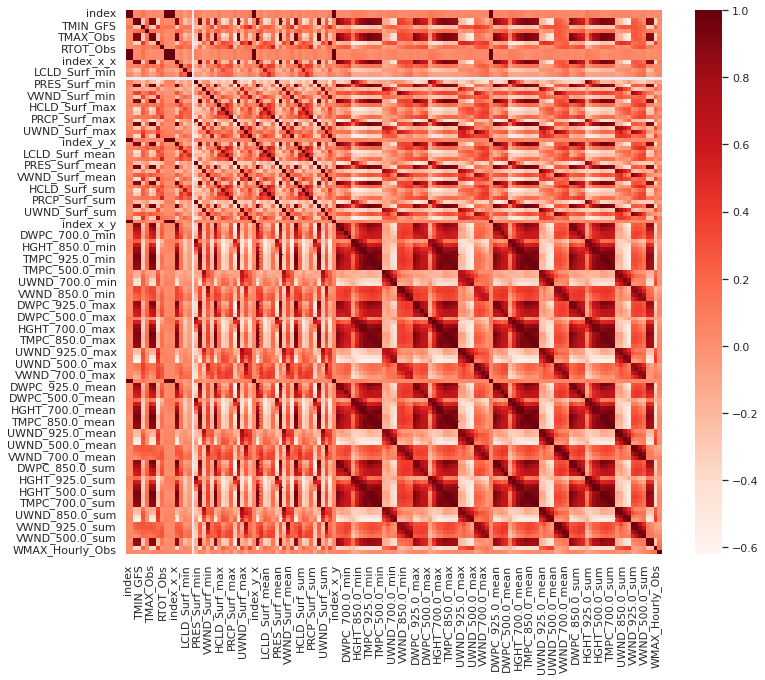

In [45]:
plt.figure(figsize=(12,10))
cor = features_df.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

In [0]:
from sklearn.preprocessing import StandardScaler

# Function for creating linear model and printing 
def lin_model_func(features, target):
    scaler = StandardScaler()

    lin_model = LinearRegression()

    # Split the data into training and testing data, selecting only the desired features and target variable 
    x_train = x_train_all[features]
    y_train = y_train_all[target]

    x_test = x_test_all[features]
    y_test = y_test_all[target]

    # Standardize the data
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)

    # Train the model 
    lin_model.fit(x_train, y_train)

    # Print evaluation metrics 
    print('Coefficients: \n', lin_model.coef_)
    print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, lin_model.predict(x_test)))
    print("The Root Mean Square Error: %.2f degrees celsius " %  sqrt(mean_squared_error(y_test, lin_model.predict(x_test))))
    print('Coefficient of determination: %.2f' % r2_score(y_test, lin_model.predict(x_test)))

    return x_test, y_test, lin_model

# Plot predicted values against observed values
# model_type = Multiple Linear Regression
# ex. variable = 'Max Temperature (C)'
def lin_model_plot(model_type = 'Multiple Linear Regression', variable = 'Maximum Temperature (C)', jpg_name = 'linearregression'):
    time = features_df[features_df['Year']==2019]['Time'].values
    plt.figure(figsize=(12,8))
    plt.plot(time, y_test, c='r', label='observation')
    plt.plot(time, lin_model.predict(x_test), c='g', label='prediction')
    plt.legend()
    plt.title(model_type + ': ' + variable)
    plt.xlabel('Date')
    plt.ylabel(variable)
    plt.savefig(jpg_name + '.jpg')


Max Temperature

In [199]:
# Correlation with output variable 

cor_target = abs(cor['TMAX_Obs'])

relevant_features = cor_target[cor_target>0.90]
features = relevant_features.keys().drop(['TMAX_Obs', 'TMIN_Obs'])
print(features)
features = ['TMAX_GFS', 'TMIN_GFS', 'TMPC_Surf_min', 'TMPC_Surf_max', 'TMPC_Surf_mean', 'TMPC_925.0_max', 'TMPC_850.0_min', 'DWPC_925.0_mean', 'TMPC_925.0_mean', 'TMAX_Hourly_Obs']
target = ['TMAX_Obs']
x_test, y_test, lin_model = lin_model_func(features, target)

Index(['TMAX_GFS', 'TMIN_GFS', 'DWPC_Surf_min', 'TMPC_Surf_min',
       'DWPC_Surf_max', 'TMPC_Surf_max', 'DWPC_Surf_mean', 'TMPC_Surf_mean',
       'DWPC_Surf_sum', 'TMPC_Surf_sum', 'TMPC_925.0_min', 'TMPC_850.0_min',
       'TMPC_700.0_min', 'DWPC_925.0_max', 'TMPC_925.0_max', 'TMPC_850.0_max',
       'DWPC_925.0_mean', 'TMPC_925.0_mean', 'TMPC_850.0_mean',
       'TMPC_700.0_mean', 'DWPC_925.0_sum', 'TMPC_925.0_sum', 'TMPC_850.0_sum',
       'TMPC_700.0_sum', 'TMAX_Hourly_Obs'],
      dtype='object')
Coefficients: 
 [[ 0.68667338  0.17587336 -3.24365001  6.94663268  3.56138102 -1.15166737
  -0.85489132 -0.52289487  5.50854413  0.68000745]]
The Mean Absolute Error: 1.43 degrees celsius
The Root Mean Square Error: 1.88 degrees celsius 
Coefficient of determination: 0.97


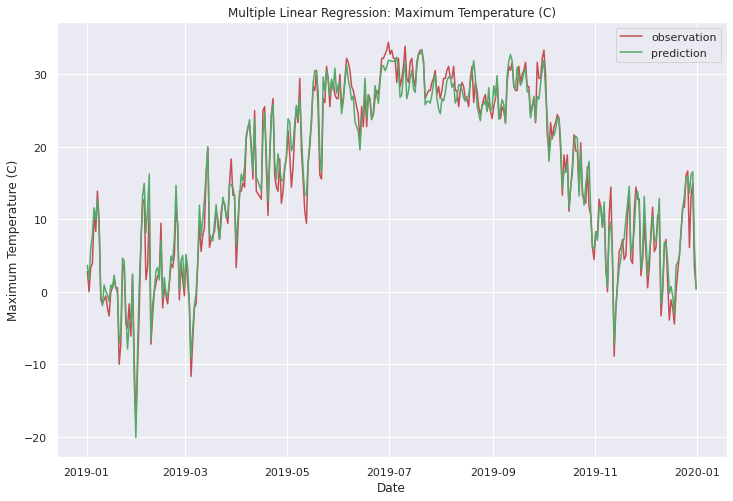

In [200]:
# Plot predicted values against observed values 
lin_model_plot(jpg_name = 'linearregression_TMAX')

Minimum Temperature

In [201]:
cor_target = abs(cor['TMIN_Obs'])

relevant_features = cor_target[cor_target>0.90]
features = relevant_features.keys().drop(['TMAX_Obs', 'TMIN_Obs'])
print(features)
features = ['TMAX_GFS', 'TMIN_GFS', 'TMPC_Surf_max', 'DWPC_Surf_mean', 'TMPC_Surf_mean', 'TMPC_925.0_min', 'TMPC_850.0_min', 'TMPC_925.0_max', 'TMPC_925.0_mean', 'TMAX_Hourly_Obs']
print(features)
target = ['TMIN_Obs']
x_test, y_test, lin_model = lin_model_func(features, target)

Index(['TMAX_GFS', 'TMIN_GFS', 'DWPC_Surf_min', 'TMPC_Surf_min',
       'DWPC_Surf_max', 'TMPC_Surf_max', 'DWPC_Surf_mean', 'TMPC_Surf_mean',
       'DWPC_Surf_sum', 'TMPC_Surf_sum', 'DWPC_925.0_min', 'TMPC_925.0_min',
       'TMPC_850.0_min', 'TMPC_700.0_min', 'DWPC_925.0_max', 'TMPC_925.0_max',
       'TMPC_850.0_max', 'DWPC_925.0_mean', 'TMPC_925.0_mean',
       'TMPC_850.0_mean', 'TMPC_700.0_mean', 'DWPC_925.0_sum',
       'TMPC_925.0_sum', 'TMPC_850.0_sum', 'TMPC_700.0_sum',
       'TMAX_Hourly_Obs'],
      dtype='object')
['TMAX_GFS', 'TMIN_GFS', 'TMPC_Surf_max', 'DWPC_Surf_mean', 'TMPC_Surf_mean', 'TMPC_925.0_min', 'TMPC_850.0_min', 'TMPC_925.0_max', 'TMPC_925.0_mean', 'TMAX_Hourly_Obs']
Coefficients: 
 [[ 0.27375514  0.63005388 -5.40940145  2.72417118 12.45994079  2.75327345
   0.86877576  0.22484612 -4.23519587  0.34571147]]
The Mean Absolute Error: 1.55 degrees celsius
The Root Mean Square Error: 1.96 degrees celsius 
Coefficient of determination: 0.97


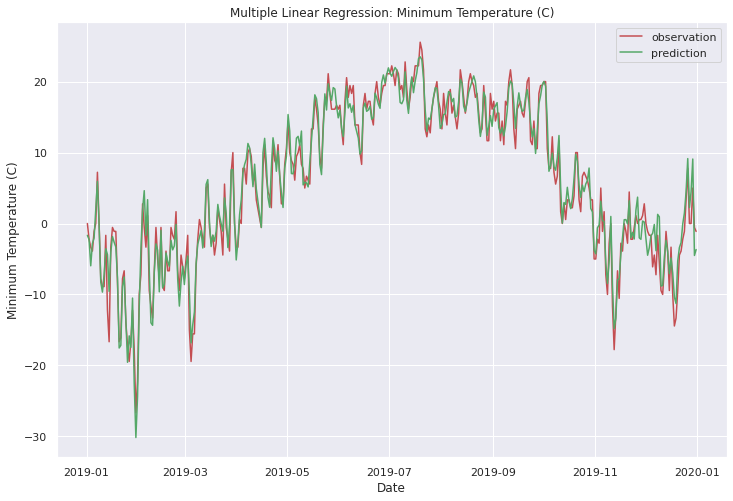

In [202]:
# Plot predicted values against observed values 
lin_model_plot(variable = 'Minimum Temperature (C)', jpg_name = 'linearregression_TMIN')

Maximum Wind Speed

In [203]:
cor_target = abs(cor['WMAX_Obs'])

relevant_features = cor_target[cor_target>0.45]
features = relevant_features.keys().drop(['WMAX_Obs'])
print(features)
target = ['WMAX_Obs']
x_test, y_test, lin_model = lin_model_func(features, target)

Index(['WSPD_Surf_min', 'UWND_Surf_max', 'WSPD_Surf_max', 'WSPD_Surf_mean',
       'WSPD_Surf_sum', 'HGHT_925.0_min', 'HGHT_850.0_min', 'HGHT_700.0_min',
       'HGHT_850.0_max', 'UWND_925.0_max', 'UWND_850.0_max', 'UWND_700.0_max',
       'HGHT_925.0_mean', 'HGHT_850.0_mean', 'HGHT_700.0_mean',
       'UWND_850.0_mean', 'HGHT_925.0_sum', 'HGHT_850.0_sum',
       'UWND_850.0_sum'],
      dtype='object')
Coefficients: 
 [[-0.23457065 -0.33001491  1.02404359  0.69183728  0.69183728 -1.61999729
   2.10511511 -0.6558456   0.18439893  0.09114463 -0.13326179  0.24334408
  -1.52168785  1.17188982 -0.82291198 -0.85129524  1.27878281 -0.66282124
   1.21571152]]
The Mean Absolute Error: 1.21 degrees celsius
The Root Mean Square Error: 1.57 degrees celsius 
Coefficient of determination: 0.73


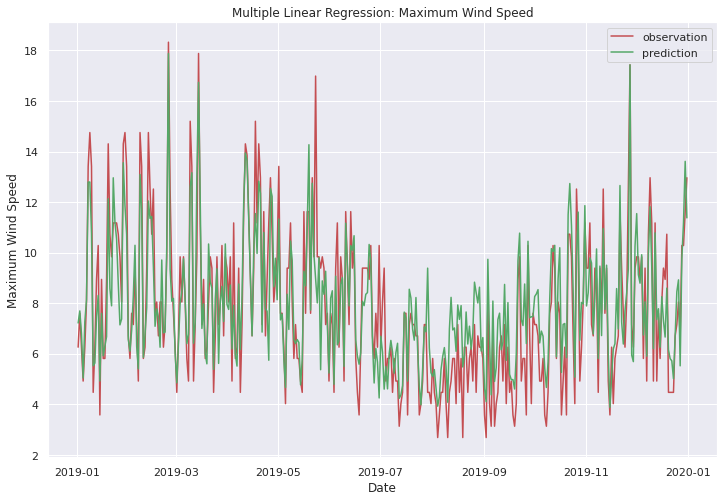

In [204]:
# Plot predicted values against observed values 
lin_model_plot(variable = 'Maximum Wind Speed', jpg_name = 'linearregression_WMAX')

Precipitation Accumulation

In [205]:
cor_target = abs(cor['RTOT_Obs'])

relevant_features = cor_target[cor_target>0.50]
features = relevant_features.keys().drop(['RTOT_Obs'])
print(features)
target = ['RTOT_Obs']
x_test, y_test, lin_model = lin_model_func(features, target)

Index(['PRCP_Surf_max', 'PRCP_Surf_mean', 'PRCP_Surf_sum'], dtype='object')
Coefficients: 
 [[-1.23919506e+00 -1.56621053e+13  1.56621053e+13]]
The Mean Absolute Error: 2.04 degrees celsius
The Root Mean Square Error: 3.86 degrees celsius 
Coefficient of determination: 0.41


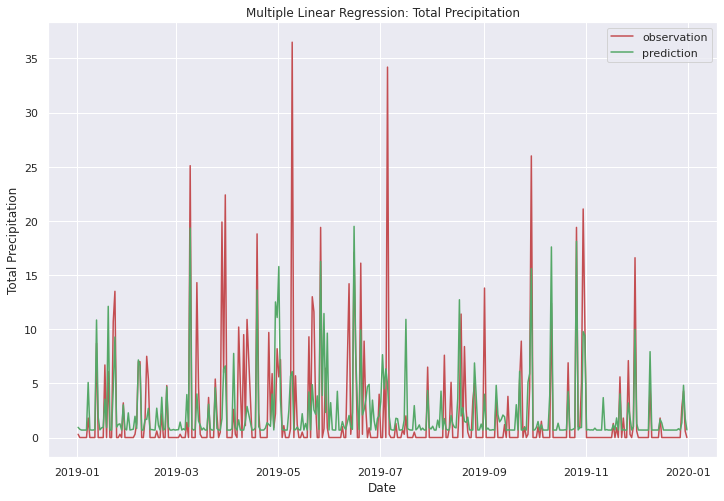

In [207]:
# Plot predicted values against observed values 
lin_model_plot(variable = 'Total Precipitation', jpg_name = 'linearregression_RTOT')

**Random Forest**

In [0]:
# Create random forest regression model 
# some code adapted from (https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
from sklearn.ensemble import RandomForestRegressor 

In [0]:
# n_estimators and max_features can be lists 
from sklearn.preprocessing import StandardScaler

def rf_model_func(features, target, n_estimators = 1000, max_features = 5):
    scaler = StandardScaler()
    x_train = x_train_all[features]
    y_train = y_train_all[target]

    x_test = x_test_all[features]
    y_test = y_test_all[target]

    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)

    for n in n_estimators: 
        for m in max_features: 
            # Train the model 
            rf_model = RandomForestRegressor(n_estimators=n, max_features=m)
            rf_model.fit(x_train, y_train)

            # Print parameters and plot
            print("# of trees =", n)
            print("Max features = ", m)
            print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, rf_model.predict(x_test)))
            print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, rf_model.predict(x_test)))
            print("The Root Mean Square Error: %.2f degrees celsius " %  sqrt(mean_squared_error(y_test, rf_model.predict(x_test))))
            print('Coefficient of determination: %.2f' % r2_score(y_test, rf_model.predict(x_test)))

    print(sorted(zip(map(lambda x: round(x, 4), rf_model.feature_importances_), features), reverse=True))
    return x_test, y_test, rf_model

def rf_model_plot(model_type = 'Random Forest', variable = 'Maximum Temperature (C)', jpg_name = 'randomforest_TMAX'):
    time = features_df[features_df['Year']==2019]['Time'].values
    plt.figure(figsize=(12,8))
    plt.plot(time, y_test, c='r', label='observation')
    plt.plot(time, rf_model.predict(x_test), c='g', label='prediction')
    plt.legend()
    plt.title(model_type + ': ' + variable)
    plt.xlabel('Date')
    plt.ylabel(variable)
    plt.savefig(jpg_name + '.jpg')
    plt.show()

Maximum Temperature

In [208]:
cor_target = abs(cor['TMAX_Obs'])

relevant_features = cor_target[cor_target>0.90]
features = relevant_features.keys().drop(['TMAX_Obs', 'TMIN_Obs'])
features = ['TMAX_GFS', 'TMIN_GFS', 'DWPC_Surf_min', 'TMPC_Surf_min', 'DWPC_Surf_max', 'TMPC_Surf_max', 'DWPC_Surf_mean', 'TMPC_925.0_min', 'TMPC_850.0_min', 'DWPC_925.0_mean', 'TMPC_925.0_mean', 'TMPC_850.0_mean', 'TMPC_700.0_mean']
print(features)

target = ['TMAX_Obs']

x_test, y_test, rf_model = rf_model_func(features, target, n_estimators = [100], max_features = [4]) 

['TMAX_GFS', 'TMIN_GFS', 'DWPC_Surf_min', 'TMPC_Surf_min', 'DWPC_Surf_max', 'TMPC_Surf_max', 'DWPC_Surf_mean', 'TMPC_925.0_min', 'TMPC_850.0_min', 'DWPC_925.0_mean', 'TMPC_925.0_mean', 'TMPC_850.0_mean', 'TMPC_700.0_mean']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


# of trees = 100
Max features =  4
The Mean Absolute Error: 1.51 degrees celsius
The Root Mean Square Error: 2.01 degrees celsius 
Coefficient of determination: 0.97
[(0.2754, 'TMPC_925.0_mean'), (0.262, 'TMPC_Surf_max'), (0.2162, 'TMPC_925.0_min'), (0.1037, 'TMPC_Surf_min'), (0.0386, 'TMPC_850.0_mean'), (0.0305, 'TMPC_850.0_min'), (0.0264, 'TMIN_GFS'), (0.023, 'DWPC_Surf_mean'), (0.009, 'DWPC_Surf_max'), (0.0067, 'TMAX_GFS'), (0.0036, 'DWPC_925.0_mean'), (0.0025, 'TMPC_700.0_mean'), (0.0025, 'DWPC_Surf_min')]


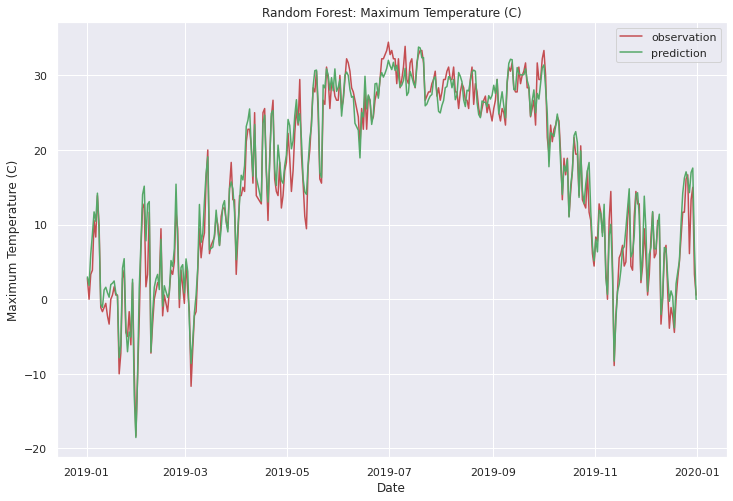

In [210]:
# Plot predicted values against observed values 
rf_model_plot()

Minimum Temperature

In [211]:
cor_target = abs(cor['TMIN_Obs'])

relevant_features = cor_target[cor_target>0.92]
features = relevant_features.keys().drop(['TMAX_Obs', 'TMIN_Obs'])
print(features)

target = ['TMIN_Obs']

x_test, y_test, rf_model = rf_model_func(features, target, n_estimators = [1000], max_features = [5])

Index(['TMIN_GFS', 'DWPC_Surf_min', 'TMPC_Surf_min', 'DWPC_Surf_max',
       'TMPC_Surf_max', 'DWPC_Surf_mean', 'TMPC_Surf_mean', 'DWPC_Surf_sum',
       'TMPC_Surf_sum', 'DWPC_925.0_min', 'TMPC_925.0_min', 'TMPC_850.0_min',
       'DWPC_925.0_max', 'TMPC_925.0_max', 'DWPC_925.0_mean',
       'TMPC_925.0_mean', 'TMPC_850.0_mean', 'DWPC_925.0_sum',
       'TMPC_925.0_sum', 'TMPC_850.0_sum'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


# of trees = 1000
Max features =  5
The Mean Absolute Error: 1.42 degrees celsius
The Median Absolute Error: 1.16 degrees celsius
The Root Mean Square Error: 1.86 degrees celsius 
Coefficient of determination: 0.97
[(0.2389, 'TMPC_Surf_min'), (0.169, 'TMPC_Surf_mean'), (0.146, 'TMPC_Surf_sum'), (0.1319, 'DWPC_Surf_min'), (0.0746, 'DWPC_Surf_mean'), (0.071, 'DWPC_Surf_sum'), (0.0454, 'TMPC_925.0_sum'), (0.0362, 'TMPC_925.0_mean'), (0.0247, 'TMPC_925.0_min'), (0.0159, 'TMPC_Surf_max'), (0.0147, 'DWPC_925.0_sum'), (0.0106, 'DWPC_925.0_mean'), (0.0042, 'TMPC_925.0_max'), (0.0041, 'DWPC_Surf_max'), (0.0029, 'TMIN_GFS'), (0.0027, 'DWPC_925.0_min'), (0.0021, 'TMPC_850.0_min'), (0.002, 'TMPC_850.0_sum'), (0.0016, 'DWPC_925.0_max'), (0.0014, 'TMPC_850.0_mean')]


Wind Speed

In [176]:
cor_target = abs(cor['WMAX_Obs'])

relevant_features = cor_target[cor_target>0.40]
features = relevant_features.keys().drop(['WMAX_Obs'])
print(features)
features = ['WMAX_GFS', 'PRES_Surf_min', 'WSPD_Surf_min', 'WSPD_Surf_max', 'WSPD_Surf_mean', 'WSPD_Surf_sum', 'UWND_925.0_max', 'HGHT_500.0_mean', 'UWND_850.0_mean']
target = ['WMAX_Obs']

x_test, y_test, rf_model = rf_model_func(features, target, n_estimators = [300], max_features = [5])

Index(['WMAX_GFS', 'PRES_Surf_min', 'WSPD_Surf_min', 'UWND_Surf_max',
       'WSPD_Surf_max', 'WSPD_Surf_mean', 'WSPD_Surf_sum', 'HGHT_925.0_min',
       'HGHT_850.0_min', 'HGHT_700.0_min', 'HGHT_500.0_min', 'HGHT_850.0_max',
       'HGHT_700.0_max', 'UWND_925.0_max', 'UWND_850.0_max', 'UWND_700.0_max',
       'UWND_500.0_max', 'HGHT_925.0_mean', 'HGHT_850.0_mean',
       'HGHT_700.0_mean', 'HGHT_500.0_mean', 'UWND_850.0_mean',
       'UWND_700.0_mean', 'HGHT_925.0_sum', 'HGHT_850.0_sum', 'HGHT_700.0_sum',
       'UWND_850.0_sum', 'UWND_700.0_sum'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


# of trees = 300
Max features =  5
The Mean Absolute Error: 1.22 degrees celsius
The Median Absolute Error: 0.97 degrees celsius
The Root Mean Square Error: 1.58 degrees celsius 
Coefficient of determination: 0.72
[(0.408, 'WSPD_Surf_max'), (0.1934, 'WSPD_Surf_sum'), (0.1534, 'WSPD_Surf_mean'), (0.0462, 'UWND_850.0_mean'), (0.0449, 'WSPD_Surf_min'), (0.0444, 'HGHT_500.0_mean'), (0.0416, 'PRES_Surf_min'), (0.0363, 'UWND_925.0_max'), (0.0317, 'WMAX_GFS')]


Precipitation

In [182]:
cor_target = abs(cor['RTOT_Obs'])

relevant_features = cor_target[cor_target>0.30]
print(relevant_features)
features = relevant_features.keys().drop(['RTOT_Obs'])


target = ['RTOT_Obs']

x_test, y_test, rf_model = rf_model_func(features, target, n_estimators = [1000], max_features = [1])

RTOT_Obs           1.000000
PRCP_Surf_max      0.502238
HCLD_Surf_mean     0.328010
MCLD_Surf_mean     0.303110
PRCP_Surf_mean     0.568663
HCLD_Surf_sum      0.328139
MCLD_Surf_sum      0.303288
PRCP_Surf_sum      0.568663
VWND_700.0_max     0.305346
DWPC_700.0_mean    0.315449
DWPC_500.0_mean    0.305722
DWPC_700.0_sum     0.315649
DWPC_500.0_sum     0.304144
Name: RTOT_Obs, dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


# of trees = 1000
Max features =  1
The Mean Absolute Error: 2.16 degrees celsius
The Median Absolute Error: 0.65 degrees celsius
The Root Mean Square Error: 4.08 degrees celsius 
Coefficient of determination: 0.34
[(0.1191, 'PRCP_Surf_sum'), (0.1159, 'PRCP_Surf_mean'), (0.108, 'PRCP_Surf_max'), (0.0799, 'DWPC_700.0_mean'), (0.0792, 'DWPC_700.0_sum'), (0.0764, 'DWPC_500.0_mean'), (0.0758, 'DWPC_500.0_sum'), (0.0736, 'VWND_700.0_max'), (0.0707, 'HCLD_Surf_mean'), (0.0687, 'HCLD_Surf_sum'), (0.0672, 'MCLD_Surf_mean'), (0.0656, 'MCLD_Surf_sum')]
